P Correlation coefficients: 0.81642 
S Correlation coefficients: 0.81818 
K Correlation coefficients: 0.63636 

0.00217  0.00208314  0.00570717

P Correlation coefficients: 0.81624 
S Correlation coefficients: 0.69091 
K Correlation coefficients: 0.56364 

0.00218  0.01856503  0.01654050

P Correlation coefficients: 0.81629 
S Correlation coefficients: 0.99091 
K Correlation coefficients: 0.96364 

0.00218  0.00000000  0.00000055

P Correlation coefficients: 0.81652 
S Correlation coefficients: 0.50000 
K Correlation coefficients: 0.42640 

0.00216  0.11730680  0.11384630



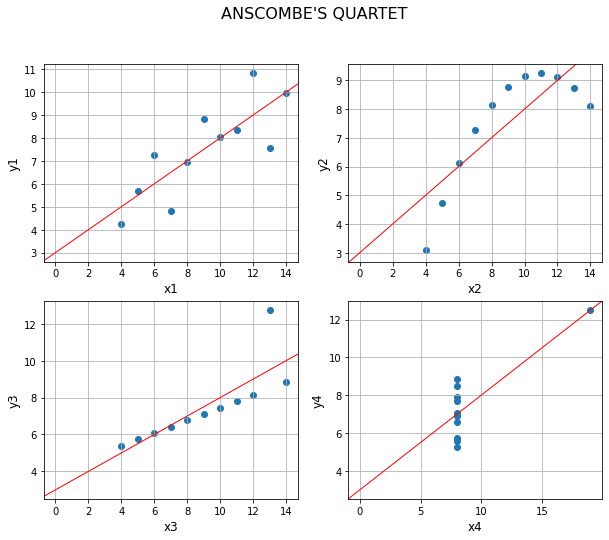

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

data = pd.read_csv("data.csv")

datasets = {
    '1': (data['x1'],data['y1']),
    '2': (data['x2'], data['y2']),
    '3': (data['x3'], data['y3']),
    '4': (data['x4'], data['y4'])
}

for (label, (x,y)) in datasets.items():
    corr_pearson,p1 = pearsonr(x, y)
    corr_spearman,p2 = spearmanr(x, y)
    corr_kendall,p3 = kendalltau(x, y)
    print("P Correlation coefficients: %.5f " %corr_pearson)
    print("S Correlation coefficients: %.5f " %corr_spearman)
    print("K Correlation coefficients: %.5f \n" %corr_kendall)

    print("%.5f  %.8f  %.8f\n" %(p1,p2,p3))


fig, axs = plt.subplots(2,2,figsize=(10,8))

for ax, (i, (x, y)) in zip(axs.flat, datasets.items()):
    ax.grid()
    ax.scatter(x,y)
    ax.set_xlabel("x%s" %(i),fontsize = 12)
    ax.set_ylabel("y%s" %(i),fontsize = 12)

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=1)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    #bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    #ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            #transform=ax.transAxes, horizontalalignment='right')

plt.suptitle("ANSCOMBE'S QUARTET",fontsize = 16)
plt.show()